In [5]:
import pandas as pd
import numpy as np
import ast

In [3]:
df = pd.read_csv('Datasets/train.csv', names=['id', 'track_name', 'artist_id', 'artist_name', 'genre_list', 'rating', 'num_favourite'], converters={'genre_list': ast.literal_eval})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210519 entries, 0 to 210518
Data columns (total 7 columns):
id               210519 non-null int64
track_name       131723 non-null object
artist_id        131724 non-null float64
artist_name      131724 non-null object
genre_list       210519 non-null object
rating           131724 non-null float64
num_favourite    131724 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 11.2+ MB


In [4]:
# drop null
clean_data = df.dropna(subset=['track_name'])
clean_data.head()
    

,id,track_name,artist_id,artist_name,genre_list,rating,num_favourite
1,6477168,Night at Charlies,494698.0,Jacques Vidal,[],1.0,0.0
2,2516445,Saren's Base,34907.0,Jack Wall,[],17.0,0.0
5,6640025,Sleep Tonight,528869.0,Spider Silk Dress,"[{'genre_id': 21, 'genre_name': 'Rock'}]",1.0,0.0
6,5493388,Don't Dare Call,290188.0,Mississippi Heat,"[{'genre_id': 2, 'genre_name': 'Blues'}]",1.0,0.0
8,1619153,Bootylicious Vinyl,14014.0,Zebrahead,"[{'genre_id': 14, 'genre_name': 'Pop'}, {'genr...",20.0,5.0


In [5]:
# Shuffle row index
import numpy.random as npr

npr.seed(123)
row_index = np.arange(len(clean_data))
npr.shuffle(row_index)

In [2]:
# Get vocabulary of unstemmed words
REVERSE_MAPPING_PATH = 'Datasets/mxm_reverse_mapping.txt'

unstemmer = pd.read_csv(REVERSE_MAPPING_PATH, sep='<SEP>', engine='python', names=['stemmed', 'original'])
mapping = {row.stemmed: row.original for idx, row in unstemmer.iterrows()}
vocab = [mapping[stemmed] for stemmed in vocab]

In [7]:
# Read mxm_dataset_train.txt and make a matrix of the word counts
def get_model_data(idList, N):
    matrix = []
    first = True

    with open('Datasets/mxm_dataset_train.txt') as f:
        for line in f:
            if line[:2] == 'TR' and int(line.split(',')[1]) in idList:
                words = line.strip('\n').split(',')[2:]
                matrix_row = np.zeros(N)

                for i_c in words:
                    index, count = i_c.split(':')
                    matrix_row[int(index)-1] = int(count)

                # concatenate row to the matrix
                if first:
                    matrix = np.array([matrix_row])
                    first = False
                else:
                    matrix = np.concatenate((matrix, np.array([matrix_row])))
    return matrix


In [89]:
# Read mxm_dataset_train.txt and make a matrix of the word counts
def get_all_word_coutns(N, matrix=[], first=False, start=18):
    end = start + 1000

    with open('Datasets/mxm_dataset_train.txt') as f:
        for line in f.readlines()[start:end]:
            # if line[:2] == 'TR':
            words = line.strip('\n').split(',')[2:]
            matrix_row = np.zeros(N)

            for i_c in words:
                index, count = i_c.split(':')
                matrix_row[int(index)-1] = int(count)

            # concatenate row to the matrix
            if first:
                matrix = np.array([matrix_row])
                first = False
            else:
                matrix = np.concatenate((matrix, np.array([matrix_row])))

    return matrix

In [124]:
all_counts = get_all_word_coutns(len(vocab), first=True)

In [127]:
all_counts = get_all_word_coutns(len(vocab), matrix=all_counts, start=1018)

In [128]:
ALL_COUNTS = all_counts
# ALL_COUNTS = np.array([1,2,3])
# print(ALL_COUNTS)

In [136]:
# [-1]
for i in range(10018, 20019, 1000):
    all_counts = get_all_word_coutns(len(vocab), matrix=all_counts, start=i)
    print(len(all_counts))
    ALL_COUNTS = all_counts



12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


In [129]:
ALL_COUNTS

array([[ 6.,  4.,  2., ...,  0.,  0.,  0.],
       [10.,  0., 17., ...,  0.,  0.,  0.],
       [28., 15.,  2., ...,  0.,  0.,  0.],
       ...,
       [13.,  2.,  5., ...,  0.,  0.,  0.],
       [ 3.,  3.,  3., ...,  0.,  0.,  0.],
       [13.,  2.,  4., ...,  0.,  0.,  0.]])

In [144]:
with open('Datasets/count_matrix.txt') as f:
    x = f.readlines()[0]

print(len(x))

20001


In [135]:
range(10018, 20019, 1000)[-1]
range(10018, 20019, 1000)[0]


10018

In [130]:
all_counts

array([[ 6.,  4.,  2., ...,  0.,  0.,  0.],
       [10.,  0., 17., ...,  0.,  0.,  0.],
       [28., 15.,  2., ...,  0.,  0.,  0.],
       ...,
       [13.,  2.,  5., ...,  0.,  0.,  0.],
       [ 3.,  3.,  3., ...,  0.,  0.,  0.],
       [13.,  2.,  4., ...,  0.,  0.,  0.]])

In [143]:
with open('Datasets/count_matrix.txt', 'a') as f:
    for y in ALL_COUNTS:
        for x in y:
            f.write(str(x) + '\n')

        f.write('\n')

In [137]:
len(ALL_COUNTS)

22000

In [8]:
train_index = row_index[:2000]
train_id = [clean_data.iloc[i,0] for i in train_index]
train_id[:5]

[6278419, 8914715, 6530365, 7361515, 6459376]

In [9]:
train_data = get_model_data(train_id, len(vocab))

In [10]:
train_label = [float(clean_data[clean_data['id'] == id]['rating']) for id in train_id]

In [11]:
test_index = row_index[3000:4000]
test_id = [clean_data.iloc[i,0] for i in test_index]

test_data = get_model_data(test_id, len(vocab))
test_label = [float(clean_data[clean_data['id'] == id]['rating']) for id in test_id]


In [12]:
def train_model_predict(classifier, train_features, train_labels, test_features):
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    return predictions

In [13]:
# Logistic regression & Bag-of-Words
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear')
log_prediction = train_model_predict(log_model, train_data, train_label, test_data)

In [14]:
from sklearn import metrics

print('Accuracy:', np.round(metrics.accuracy_score(test_label, log_prediction), 4))
print('Precision:', np.round(metrics.precision_score(test_label, log_prediction, average='weighted'), 4))
print('Recall:', np.round(metrics.recall_score(test_label, log_prediction, average='weighted'), 4))
print('F1 score:', np.round(metrics.f1_score(test_label, log_prediction, average='weighted'), 4))


Accuracy: 0.777
Precision: 0.6827
Recall: 0.777
F1 score: 0.7268


## Word Cloud

In [187]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
sum_per_word = np.sum(ALL_COUNTS, axis=0, dtype=np.int64)
freq = {}
for i, v in enumerate(vocab):
    freq[v] = sum_per_word[i]

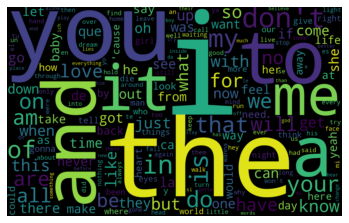

In [188]:
wordcloud = WordCloud(width=1600, height=1000)

wordcloud.generate_from_frequencies(freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Lasso for importance of words

In [190]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled_data = scaler.fit_transform(train_data)
test_scaled_data = scaler.fit_transform(test_data)

reg_rating = Lasso(alpha=0.1).fit(train_scaled_data, train_label)
print('Lasso rating score on training data:', reg_rating.score(train_scaled_data, train_label))

coef_rating = reg_rating.coef_
print(np.sum(coef_rating != 0))

NameError: name 'train_data' is not defined

In [189]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler

reg_rating2 = Lasso(alpha=10).fit(train_scaled_data, train_label)
print('Lasso rating score on training data:', reg_rating2.score(train_scaled_data, train_label))

coef_rating2 = reg_rating2.coef_
print(np.sum(coef_rating2 != 0))

NameError: name 'train_scaled_data' is not defined

Text(0.5, 1.0, 'Word importance for rating using Lasso model')

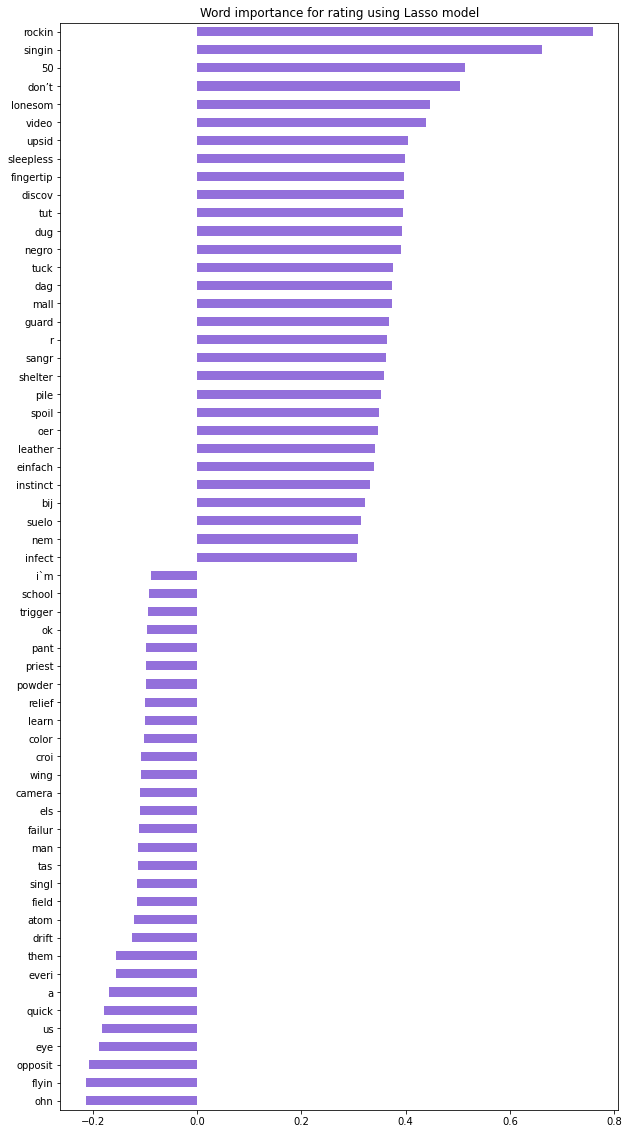

In [123]:
# Plot
word_rating = pd.Series(coef_rating, index=vocab)

word_rating = word_rating[word_rating != 0]
word_rating = word_rating.sort_values()

pos = word_rating[-30:]
neg = word_rating[:30]
k = neg.append(pos)

matplotlib.rcParams['figure.figsize'] = (10, 20)
k.plot(kind = 'barh', color='mediumpurple')
plt.title('Word importance for rating using Lasso model')